# Acessando Dados Espaciais - GeoPandas

### Revisão

A estrututa básica no GeoPandas é o GeoDataFrame.

O GeoDataFrame é simplesmente um DataFrame do Pandas com a adição de um GeoSeries

Um Series no Pandas é igual a um campo de uma tabela em um banco de dados ou um atributo de uma feição ou conjunto de dados geográficos.

Um GeoSeries é um tipo especial de coluna que contém uma geometria do tipo vetorial.

As geometrias são tratadas internamente como objetos do tipo Shapely.

### Lendo arquivos com 1 camada

O GeoPandas usa o Fiona para ler dados espaciais para os GeoDataFrames

O GeoPandas também pode ler dados diretamente de um banco de dados PostGIS

## Lendo arquivos Shape


In [9]:
%matplotlib inline
import geopandas as gpd

In [10]:
bairros = gpd.read_file("data/BAIRRO_POPULAR.shp")

In [11]:
bairros.tail(10)

,ID,CODIGO,NOME,AREA_KM2,PERIMETR_M,geometry
477,418.0,1427.0,Vila Independência IV,0.029,817.160,"POLYGON ((601396.107 7786236.889, 601495.157 7..."
478,137.0,760.0,Sagrada Família,2.291,7026.277,"POLYGON ((612264.364 7799820.026, 612429.175 7..."
479,23.0,628.0,Caiçaras,2.246,8686.832,"POLYGON ((607914.303 7800682.125, 607974.902 7..."
480,140.0,763.0,Santa Cruz,1.741,6868.672,"POLYGON ((610126.263 7802338.877, 610147.711 7..."
481,425.0,1677.0,Vila Mangueiras,0.093,2304.738,"POLYGON ((600528.763 7786598.398, 600560.057 7..."
482,244.0,1166.0,Mineirão,0.394,2768.098,"POLYGON ((601324.879 7785562.653, 601360.798 7..."
483,144.0,768.0,Santa Lúcia,2.110,9646.137,"POLYGON ((610121.611 7793273.353, 610036.530 7..."
484,124.0,742.0,Bandeirantes,4.776,13884.018,"POLYGON ((603530.377 7803985.581, 603534.838 7..."
485,191.0,816.0,Maria Virgínia,0.575,5975.119,"MULTIPOLYGON (((610726.712 7802468.961, 610729..."
486,151.0,775.0,Santa Terezinha,1.476,5327.344,"POLYGON ((603754.434 7802940.018, 603888.545 7..."


<Axes: >

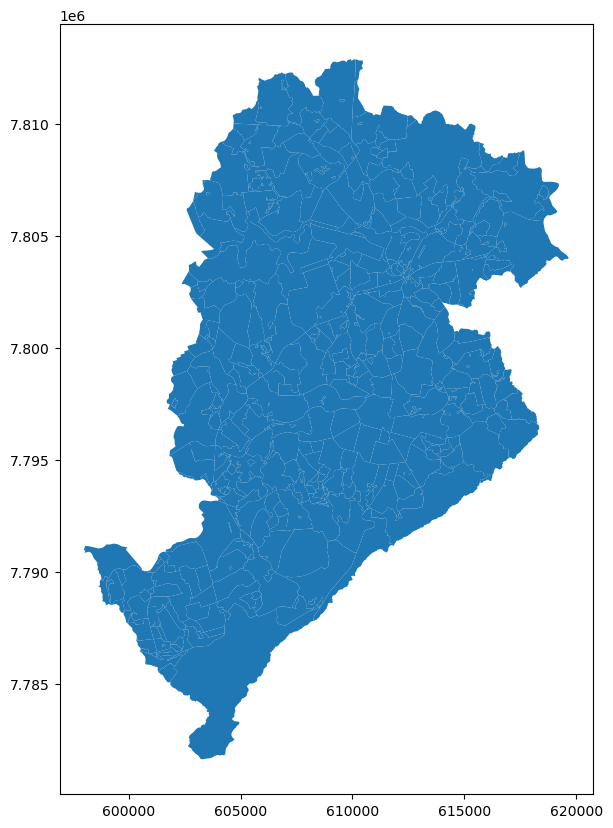

In [12]:
bairros.plot(figsize=(10,10))

View the map with colors determined by a column value

<Axes: >

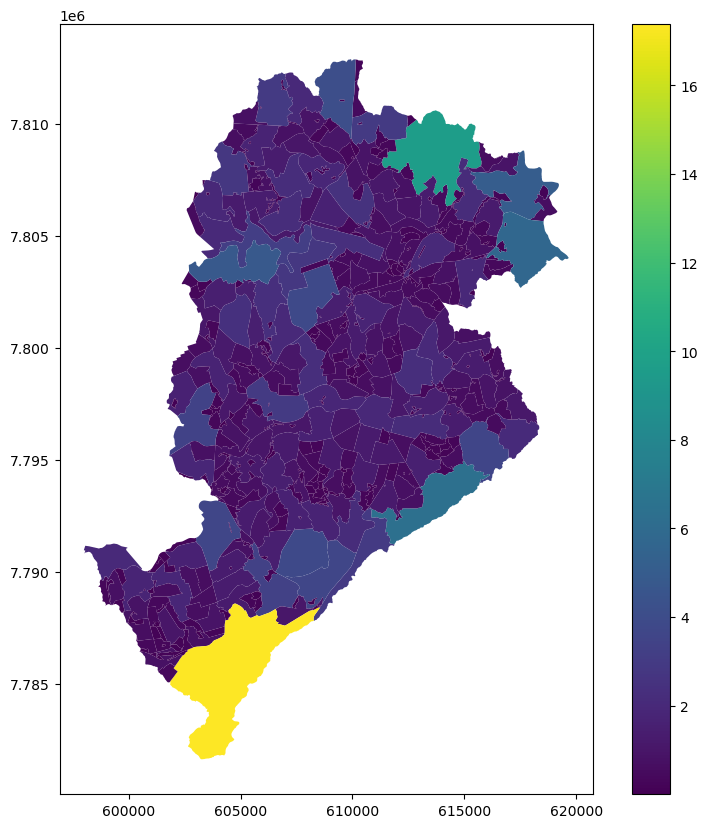

In [10]:
bairros.plot(column = "AREA_KM2", legend=True, figsize=(10, 10))

In [11]:
bairros.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          487 non-null    float64 
 1   CODIGO      487 non-null    float64 
 2   NOME        487 non-null    object  
 3   AREA_KM2    487 non-null    float64 
 4   PERIMETR_M  487 non-null    float64 
 5   geometry    487 non-null    geometry
dtypes: float64(4), geometry(1), object(1)
memory usage: 23.0+ KB


In [12]:
bairros.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [13]:
regional = gpd.read_file("data/REGIONAL.shp")
sede_regional = gpd.read_file("data/SEDE_REGIONAL.shp")

<Axes: >

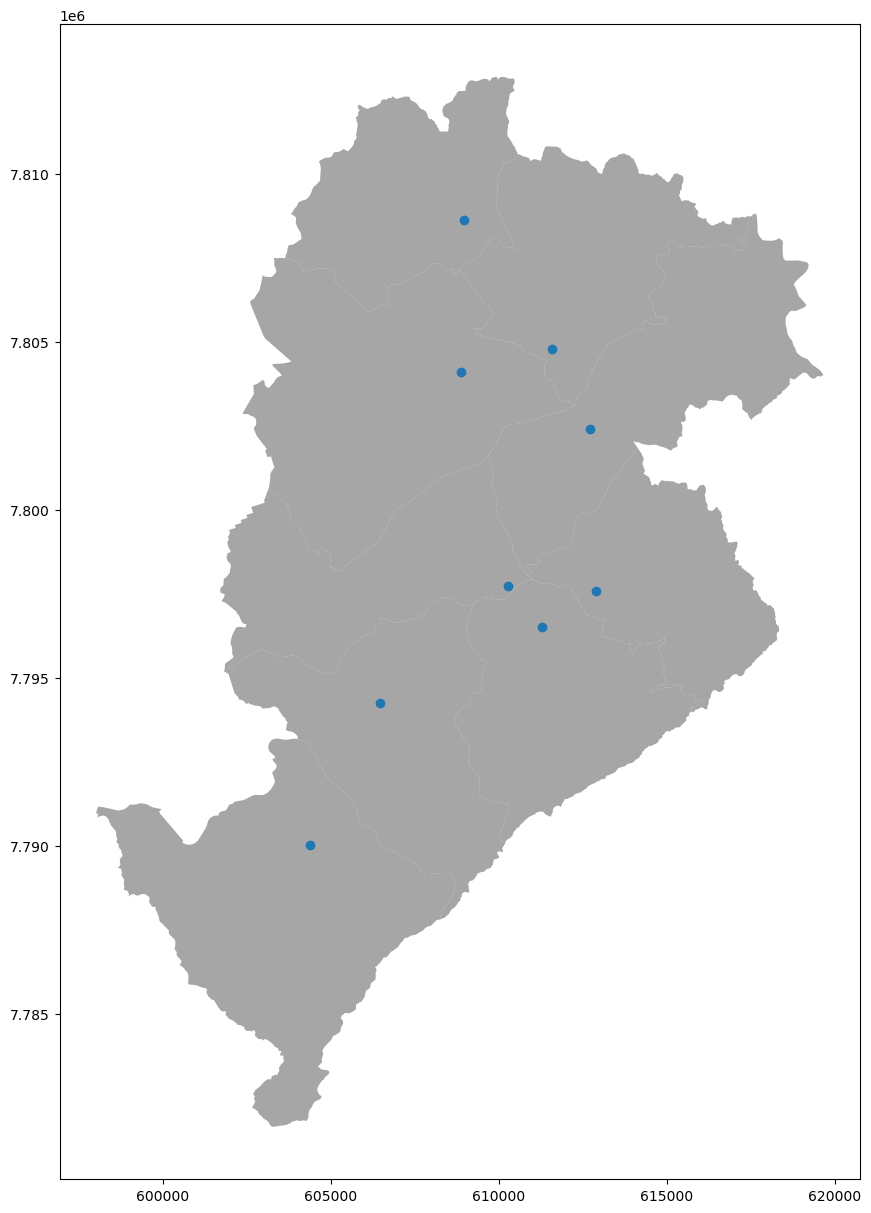

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots (figsize = (15,15))
regional.plot(ax = ax, alpha = 0.7, color = "gray")
sede_regional.plot(ax = ax)

## Lendo um Arquivo GeoJSON


In [14]:
escolas_mun = gpd.read_file("data/escola_municipal.geojson")

In [15]:
escolas_mun.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

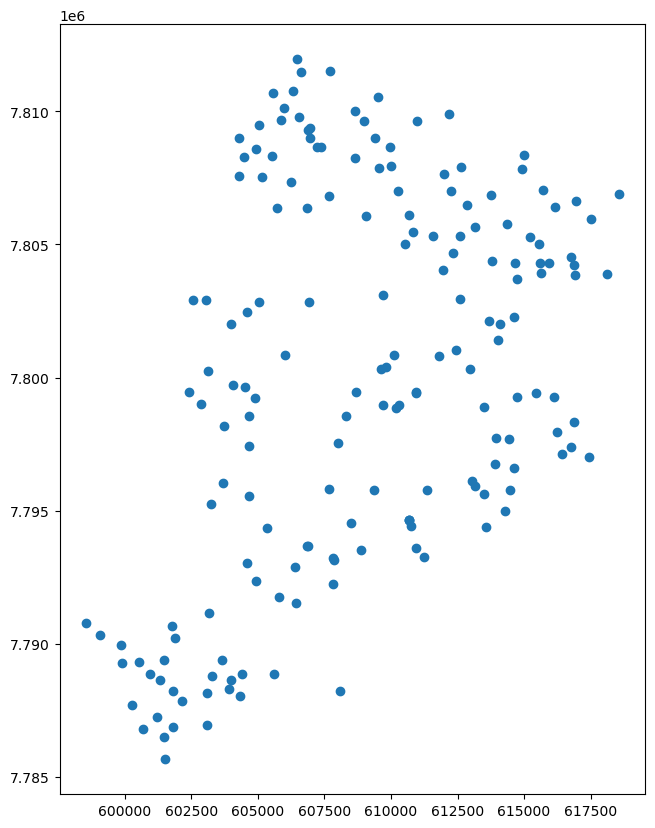

In [16]:
escolas_mun.plot(figsize=(10,10))

In [17]:
escolas_mun.head()

,id,ID_EQUIP_EDUCACAO,NOME,DEPENDENCIA_ADM,CODIGO_INEP,TIPO_LOGRADOURO,LOGRADOURO,NUMERO,COMPLEMENTO,BAIRRO,REGIONAL,geometry
0,ESCOLAS_MUNICIPAIS_ENSINO_FUNDAMENTAL.1981911,1981911,ESCOLA MUNICIPAL BELO HORIZONTE,Municipal,31002593,AVENIDA,JOSE BONIFACIO,189,None,São Cristóvão,NOROESTE,POINT (610175.909 7798851.507)
1,ESCOLAS_MUNICIPAIS_ENSINO_FUNDAMENTAL.1981851,1981851,ESCOLA MUNICIPAL FRANCISCA ALVES,Municipal,31002682,AVENIDA,SANTA TEREZINHA,8,None,Conjunto Lagoa,PAMPULHA,POINT (605029.389 7802820.210)
2,ESCOLAS_MUNICIPAIS_ENSINO_FUNDAMENTAL.1981958,1981958,ESCOLA MUNICIPAL ANISIO TEIXEIRA,Municipal,31250651,RUA,BOLIVAR,10,None,União,NORDESTE,POINT (612440.267 7801048.000)
3,ESCOLAS_MUNICIPAIS_ENSINO_FUNDAMENTAL.1981876,1981876,ESCOLA MUNICIPAL ULYSSES GUIMARAES,Municipal,31231983,RUA,BOLIVIA,532,None,Santa Rita de Cássia,CENTRO-SUL,POINT (610930.997 7793592.238)
4,ESCOLAS_MUNICIPAIS_ENSINO_FUNDAMENTAL.1981737,1981737,ESCOLA MUNICIPAL DULCE MARIA HOMEM,Municipal,31212776,RUA,TRES MARIAS,221,None,Miramar,BARREIRO,POINT (603275.984 7788781.407)


In [18]:
escolas_mun.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 178 non-null    object  
 1   ID_EQUIP_EDUCACAO  178 non-null    int64   
 2   NOME               178 non-null    object  
 3   DEPENDENCIA_ADM    178 non-null    object  
 4   CODIGO_INEP        178 non-null    object  
 5   TIPO_LOGRADOURO    178 non-null    object  
 6   LOGRADOURO         178 non-null    object  
 7   NUMERO             178 non-null    int64   
 8   COMPLEMENTO        0 non-null      object  
 9   BAIRRO             178 non-null    object  
 10  REGIONAL           178 non-null    object  
 11  geometry           178 non-null    geometry
dtypes: geometry(1), int64(2), object(9)
memory usage: 16.8+ KB


Escolas Particulares

In [19]:
escolas_par = gpd.read_file("data/escola_particular.geojson")

In [20]:
escolas_par.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [21]:
escolas_par.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 739 non-null    object  
 1   ID_EQUIP_EDUCACAO  739 non-null    int64   
 2   NOME               739 non-null    object  
 3   DEPENDENCIA_ADM    739 non-null    object  
 4   CODIGO_INEP        739 non-null    object  
 5   TIPO_LOGRADOURO    739 non-null    object  
 6   LOGRADOURO         739 non-null    object  
 7   NUMERO             739 non-null    int64   
 8   COMPLEMENTO        0 non-null      object  
 9   BAIRRO             739 non-null    object  
 10  REGIONAL           739 non-null    object  
 11  geometry           739 non-null    geometry
dtypes: geometry(1), int64(2), object(9)
memory usage: 69.4+ KB


In [22]:
escolas_par.head()

,id,ID_EQUIP_EDUCACAO,NOME,DEPENDENCIA_ADM,CODIGO_INEP,TIPO_LOGRADOURO,LOGRADOURO,NUMERO,COMPLEMENTO,BAIRRO,REGIONAL,geometry
0,ESCOLAS_PARTICULARES.1982430,1982430,COLEGIO NEUSA ROCHA,Particular,31006220,ALAMEDA,DO IPE BRANCO,1197,None,São Luíz,PAMPULHA,POINT (607605.308 7803971.945)
1,ESCOLAS_PARTICULARES.1982416,1982416,COLEGIO MARIA CLARA MACHADO,Particular,31005797,AVENIDA,RAJA GABAGLIA,589,None,Cidade Jardim,CENTRO-SUL,POINT (609487.422 7794817.498)
2,ESCOLAS_PARTICULARES.1982595,1982595,INAP INST ARTE E PROJETO,Particular,31274666,AVENIDA,CARANDAI,441,None,Funcionários,CENTRO-SUL,POINT (612328.107 7796028.232)
3,ESCOLAS_PARTICULARES.1982639,1982639,ESCOLA EDUCAR - UNIDADE II,Particular,31365874,AVENIDA,SERRANA,511,None,Serrano,PAMPULHA,POINT (603452.074 7801378.303)
4,ESCOLAS_PARTICULARES.1982470,1982470,ESCOLA EDUCAR - UNIDADE I,Particular,31210200,AVENIDA,SERRANA,511,None,Serrano,PAMPULHA,POINT (603452.074 7801378.303)


<Axes: >

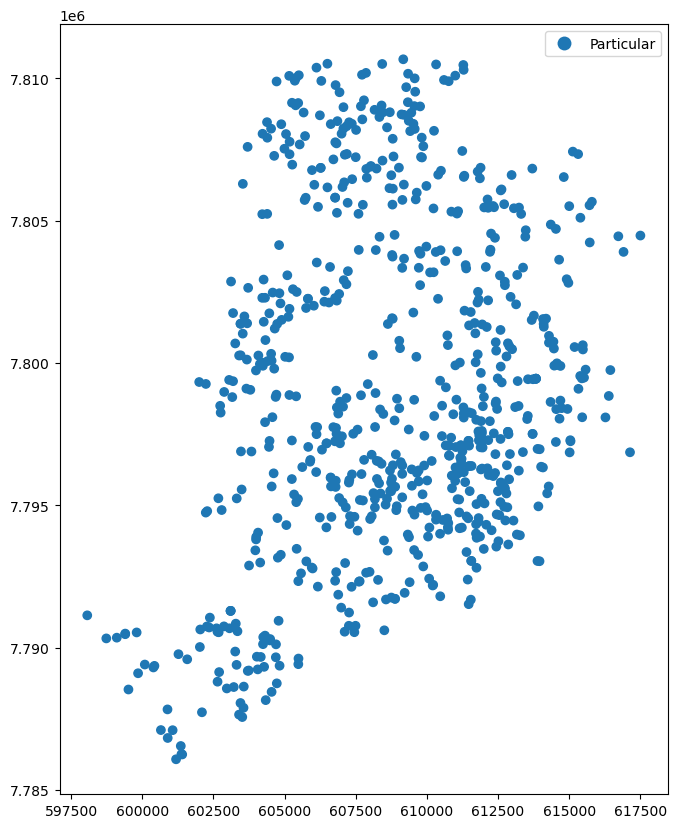

In [29]:
escolas_par.plot(column="DEPENDENCIA_ADM", legend=True, figsize=(10,10))

<Axes: >

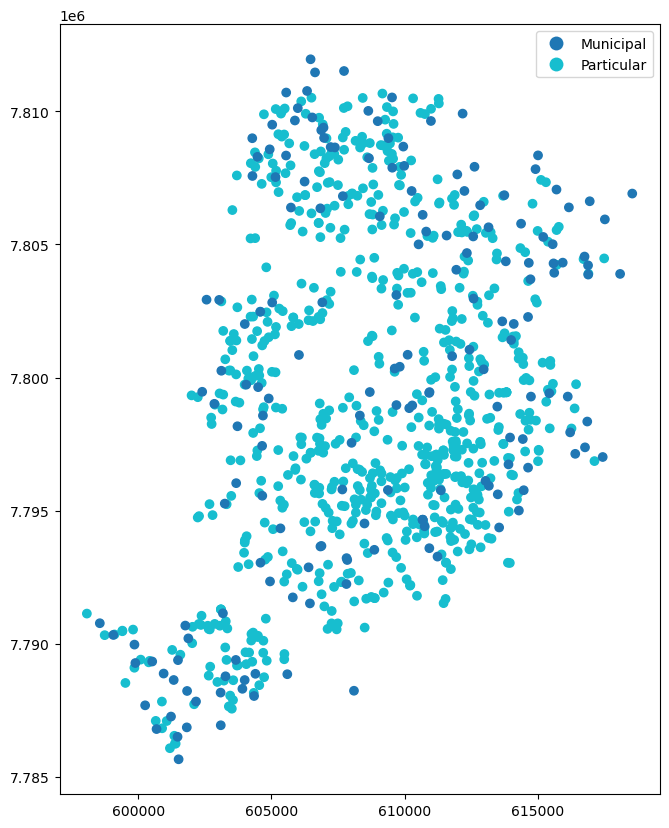

In [23]:
import pandas as pd
escolas = pd.concat([escolas_par,escolas_mun])
escolas.plot(column="DEPENDENCIA_ADM", legend=True, figsize=(10,10))

## Lendo Dados de um Banco de Dados PostGIS

É necessário importar a biblioteca psycopg que é necessária para criar a conexão co mo banco de dados.


In [24]:
import psycopg2

Next we create a database connection object

In [37]:
try:
    conn = psycopg2.connect("dbname='bhdb' user='postgres' host='localhost:5432' password='senha'")
except:
    print("Não conectou!")

Não conectou!


Finally we submit a SQL query to the database using the GeoPandas read_postgis method

In [ ]:
eagles = gpd.read_postgis("SELECT gid, lat_y_dd AS latitude, long_x_dd AS longitude, status, nest_id, geom FROM dj_eagle WHERE gid <=70 AND status = 'ACTIVE NEST'", conn)

In [ ]:
eagles.info()

In [ ]:
eagles.plot()

In [ ]:
import pandas as pd
eagle_table = pd.read_sql_query("SELECT gid, lat_y_dd AS latitude, long_x_dd AS longitude, status, nest_id, geom FROM dj_eagle WHERE gid <=70", conn)

In [ ]:
eagle_table.plot()

In [ ]:
%who_ls GeoDataFrame